In [16]:
from pymongo import MongoClient

# 네트워크 연결 규칙 : protocol://ip:port/path
client = MongoClient('mongodb://192.168.0.50:27017/')
db_name = client["DB_SGMN"]
collection = db_name["COL_SCRAPPING_TOSS_COMMENT_HISTORY"]

In [17]:
find_data = collection.find().limit(5)


In [18]:
toss_data = list(find_data)
toss_data


[{'_id': ObjectId('675082d6239b5012b3c84a0b'),
  'COMMENT': '머선일이야',
  'CREATED_AT': datetime.datetime(2024, 11, 21, 23, 59, 13, 68000),
  'DATE': '2024-11-22',
  'DATETIME': '2024-11-22T01:36:32+09:00',
  'SYMBOL': 'AADI',
  'UPDATED_AT': '2024-11-21 23:58:33'},
 {'_id': ObjectId('675082d6239b5012b3c84a0c'),
  'COMMENT': '뭐냐 너..왜 희망 갖게하냐',
  'CREATED_AT': datetime.datetime(2024, 11, 21, 23, 59, 13, 68000),
  'DATE': '2024-11-22',
  'DATETIME': '2024-11-22T01:07:42+09:00',
  'SYMBOL': 'AADI',
  'UPDATED_AT': '2024-11-21 23:58:34'},
 {'_id': ObjectId('675082d6239b5012b3c84a0d'),
  'COMMENT': '몇개월 기다리다가 조금 올라서 뺏더니 잘 올라가네.. ㅠ',
  'CREATED_AT': datetime.datetime(2024, 11, 21, 23, 59, 13, 68000),
  'DATE': '2024-11-22',
  'DATETIME': '2024-11-22T01:00:04+09:00',
  'SYMBOL': 'AADI',
  'UPDATED_AT': '2024-11-21 23:58:34'},
 {'_id': ObjectId('675082d6239b5012b3c84a0e'),
  'COMMENT': '얘는 얼마까지 갈까요',
  'CREATED_AT': datetime.datetime(2024, 11, 22, 0, 1, 24, 67000),
  'DATE': '2024-11-21',
  'DATE

In [19]:
from konlpy.tag import Okt
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [20]:

# MongoDB에서 데이터 가져오기
data = list(collection.find())

# DataFrame으로 변환
df = pd.DataFrame(data)

# 날짜 데이터를 주 단위로 변환
df['week'] = pd.to_datetime(df['DATE']).dt.isocalendar().week

# 주 단위로 텍스트 데이터를 결합
grouped = df.groupby('week')['COMMENT'].apply(' '.join).reset_index()

okt = Okt()


/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


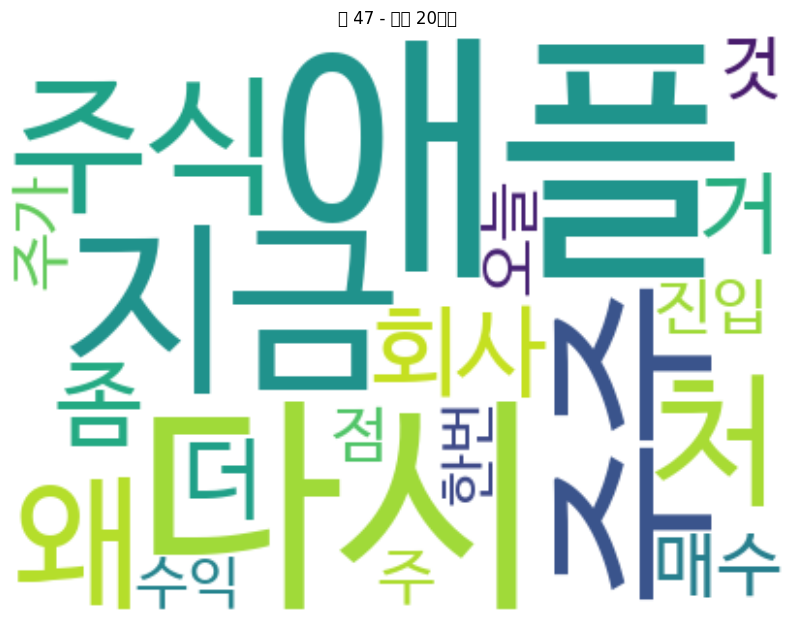

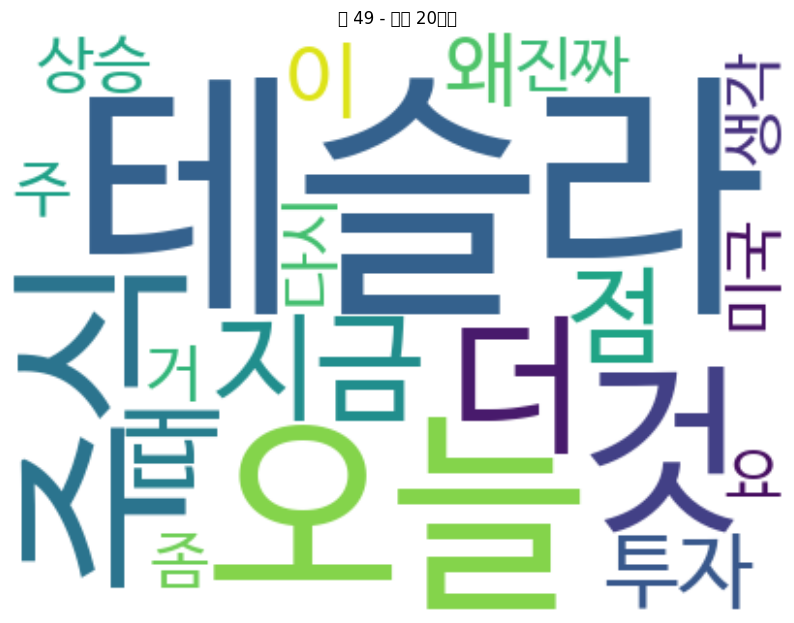

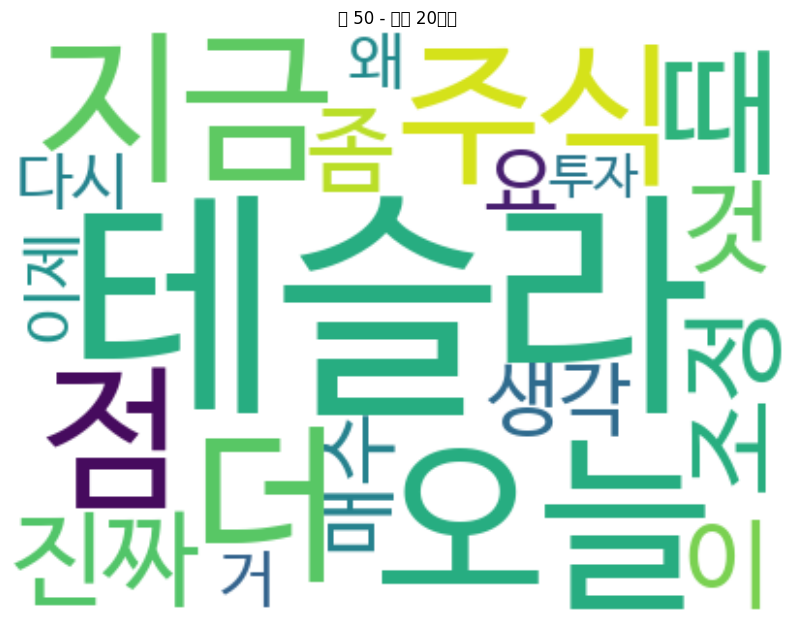

In [ ]:
for _, row in grouped.iterrows():
    week_text = row['COMMENT']
    week = row['week']
    
    # 형태소 분석
    nouns = okt.nouns(week_text)
    
    
    # 명사와 동사 빈도 계산
    noun_freq = Counter(nouns).most_common(20)
    
    
    # 명사와 동사 빈도를 기반으로 워드클라우드 생성
    noun_wordcloud = WordCloud(
        background_color='white',
        font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
        
    ).generate_from_frequencies(dict(noun_freq))
    
    
    
    # 명사 워드클라우드 표시
    plt.figure(figsize=(10, 8))
    plt.imshow(noun_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'주 {week} - 상위 20명사')
    plt.show()

    